# 📊 Exploratory Data Analysis (EDA)

In this exploratory data analysis (EDA), we systematically analyze booking patterns, check-in and check-out behaviors, revenue trends across different timeframes and segments, weekday versus weekend performance, occupancy rates, room category distributions, and booking platform insights to uncover key business drivers and operational opportunities.

---

### Data Preprocessing
- Before conducting the analysis, several preprocessing steps were performed to ensure data quality and consistency:

- Handling Missing Values: Imputed missing values in the Ratings column with the median to preserve data integrity without introducing skewness.

- Removing Duplicates: Identified and removed duplicate records to maintain data accuracy and avoid analytical redundancy.

- Datetime Conversion: Converted key columns such as Booking Date, Check-in Date, and Checkout Date into standardized datetime format to enable accurate time-based analysis.

- Data Merging: Combined the fact table with relevant dimension tables on appropriate keys to create a unified and enriched dataset.

- Renaming Columns: Renamed inconsistent or unclear column names with clear, standardized, and descriptive labels to enhance readability and usability.

---

### 1. Analyzing Booking Trends
- Explore booking volumes over time to identify seasonality and customer behavior patterns.

### 2. Analyzing Check-In Trends
- Analyze guest arrival patterns to optimize operational planning.

### 3. Analyzing Check-Out Trends
- Investigate guest departures to streamline housekeeping and turnover management.

### 4. Revenue Trends (Month, Week, Category, City, etc.)
- Examine revenue distribution across time periods, room categories, and locations to spot high-performing areas.

### 5. Weekend vs Weekday Analysis
- Compare performance differences between weekends and weekdays to refine marketing and pricing strategies.

### 6. Occupancy % and Room Trends
- Measure hotel occupancy rates and analyze room category trends to maximize space utilization and profitability.

### 7. Booking Platform & Status Analysis
- Study booking platforms and reservation statuses to understand channel performance and conversion rates.

---


In [1]:
import pandas as pd 
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dim_date_df = pd.read_csv('dim_date.csv')
dim_hotels_df = pd.read_csv('dim_hotels.csv')
dim_rooms_df = pd.read_csv('dim_rooms.csv')
fact_aggregated_bookings_df = pd.read_csv('fact_aggregated_bookings.csv')
fact_bookings_df = pd.read_csv('fact_bookings.csv')

In [4]:
dim_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [5]:
dim_date_df.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [6]:
dim_hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [7]:
dim_hotels_df.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [8]:
dim_rooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [9]:
dim_rooms_df.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [10]:
fact_aggregated_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [11]:
fact_aggregated_bookings_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [12]:
fact_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [13]:
fact_bookings_df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [14]:
fact_aggregated_bookings_df['check_in_date'] = pd.to_datetime(fact_aggregated_bookings_df['check_in_date'], format='%d-%b-%y')
fact_bookings_df['check_in_date'] = pd.to_datetime(fact_bookings_df['check_in_date'], format='%Y-%m-%d')
dim_date_df['date'] = pd.to_datetime(dim_date_df['date'], format='%d-%b-%y')

In [15]:
merged_df = pd.merge(fact_bookings_df, dim_date_df, left_on="check_in_date", right_on="date", how='left')
merged_df = pd.merge(merged_df, dim_hotels_df, on="property_id", how="left")
merged_df = pd.merge(merged_df, dim_rooms_df, left_on="room_category", right_on="room_id", how="left")

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  date               134590 non-null  datetime64[ns]
 13  mmm yy             134590 non-null  object  

In [17]:
merged_df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
date                     0
mmm yy                   0
week no                  0
day_type                 0
property_name            0
category                 0
city                     0
room_id                  0
room_class               0
dtype: int64

In [18]:
merged_df['ratings_given'].unique()

array([ 1., nan,  5.,  4.,  3.,  2.])

In [19]:
merged_df['ratings_given'].fillna(merged_df['ratings_given'].median(), inplace=True)

In [20]:
merged_df.drop_duplicates(inplace=True)

In [21]:
merged_df.drop(columns=["room_id", "date"], inplace=True)

In [22]:
merged_df.rename(columns={'category': 'property_category', 'mmm yy':'month_year', 'week no':'week_no'}, inplace=True)

In [23]:
merged_df["booking_date"] = pd.to_datetime(merged_df["booking_date"])
merged_df["checkout_date"] = pd.to_datetime(merged_df["checkout_date"])

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      134590 non-null  float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  month_year         134590 non-null  object        
 13  week_no            134590 non-null  object  

In [25]:
df = merged_df.copy()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      134590 non-null  float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  month_year         134590 non-null  object        
 13  week_no            134590 non-null  object  

In [27]:
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,month_year,week_no,day_type,property_name,property_category,city,room_class
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi,Standard
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,4.0,Cancelled,9100,3640,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi,Standard
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi,Standard
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,4.0,Cancelled,9100,3640,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi,Standard
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi,Standard


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

### Analyzing booking trends

In [29]:
df['year_month'] = df['booking_date'].dt.to_period('M')
df['week_number'] = df['booking_date'].dt.strftime('%U').astype(int) + 1

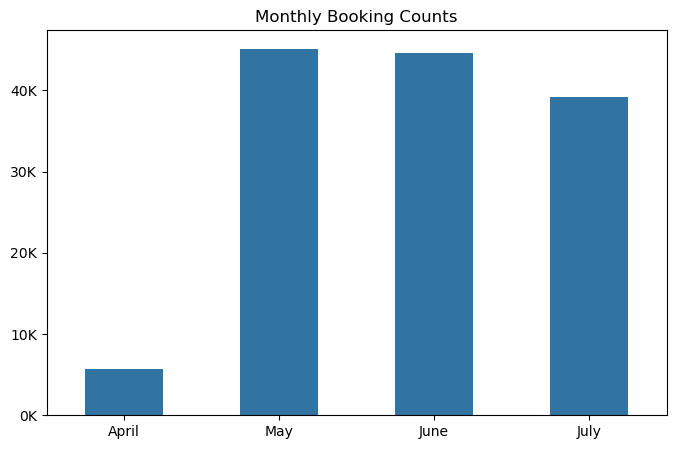

In [30]:
monthly_trend = df['year_month'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_trend.index, y=monthly_trend.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Monthly Booking Counts')
plt.xlabel('')
plt.xticks(range(0,4), labels=['April', 'May', 'June', 'July'])
plt.show()

Bookings start picking up in April, then jump sharply in May and stay high through June and July. This shows that the main booking season is from May to July, likely because of summer vacations. Since April shows a rising trend, starting promotions early—before May—can help bring in even more bookings.

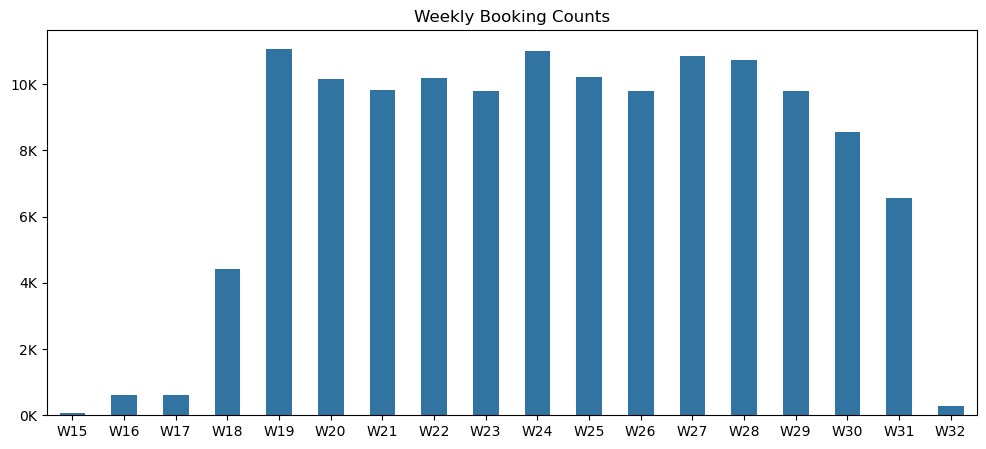

In [31]:
# Get weekly trend and sort
weekly_trend = df['week_number'].value_counts().sort_index()
# Convert index back to 'Wxx' format
weekly_trend.index = 'W' + weekly_trend.index.astype(str)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=weekly_trend.index, y=weekly_trend.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Weekly Booking Counts')
plt.xlabel('')
plt.show()

Booking volume sharply rises starting Week 17, peaks between Weeks 18 and 28, and then gradually declines through Weeks 29 to 31

### Analyzing checkin trends

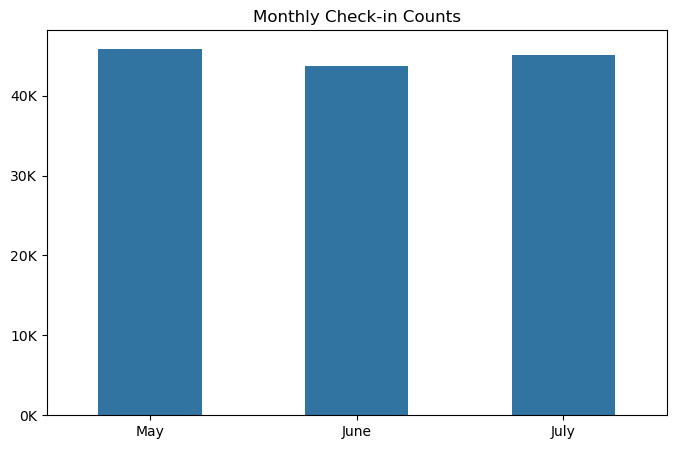

In [32]:
monthly_trend_checkin = df['month_year'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_trend_checkin.index, y=monthly_trend_checkin.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Monthly Check-in Counts')
plt.xlabel('')
plt.xticks(range(0,3), labels=['May', 'June', 'July'])
plt.show()

checkin counts are almost consistence for all 3 months

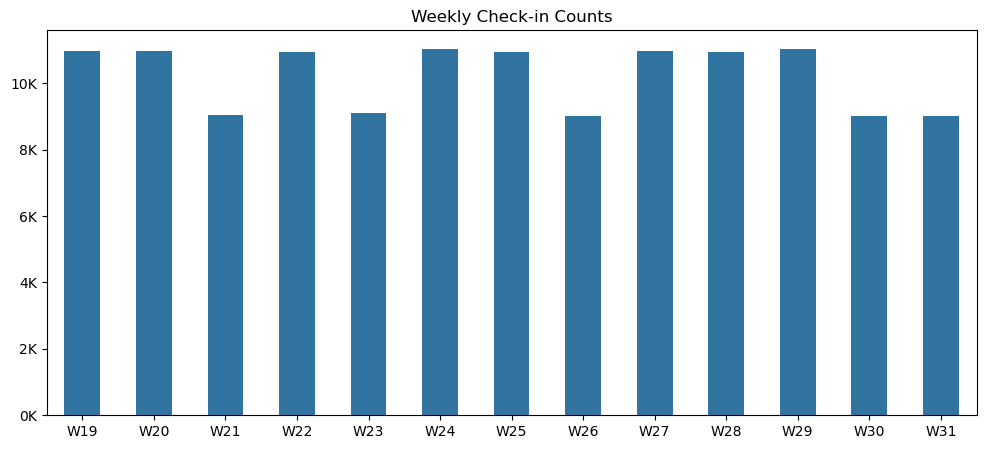

In [33]:
# Strip spaces and extract numeric week number
df['week_no'] = df['week_no'].astype(str).str.strip().str.extract(r'W\s*(\d+)')[0].astype(int)

# Get weekly trend and sort
weekly_trend_checkin = df['week_no'].value_counts().sort_index()

# Convert index back to 'Wxx' format
weekly_trend_checkin.index = 'W' + weekly_trend_checkin.index.astype(str)

# Remove W32
weekly_trend_checkin = weekly_trend_checkin.drop('W32', errors='ignore')

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=weekly_trend_checkin.index, y=weekly_trend_checkin.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Weekly Check-in Counts')
plt.xlabel('')
plt.show()


check-in period starts in May and ends in July
most check-in are done in May.
 by considering booking trends and check-in trends we conclude that bookings for particular hotels are done minimum 1-2 weeks before the check-in

### Analyzing check-out trends

In [34]:
df['year_month_checkout'] = df['checkout_date'].dt.to_period('M')
df['week_number_checkout'] = df['checkout_date'].dt.strftime('%U').astype(int) + 1

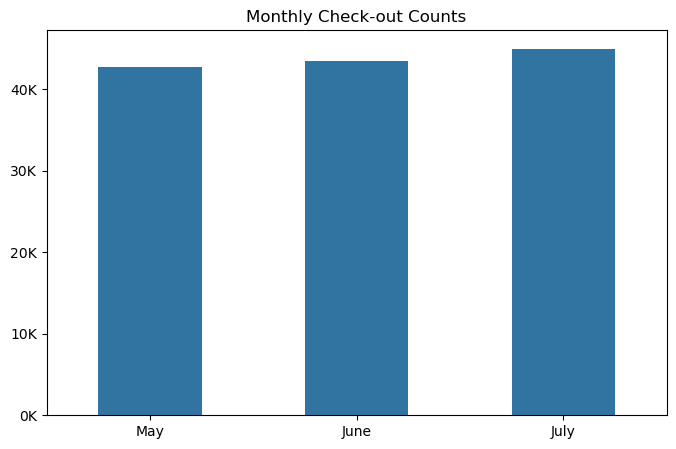

In [35]:
monthly_trend_checkout = df['year_month_checkout'].value_counts().sort_index()
monthly_trend_checkout = monthly_trend_checkout.drop('2022-08', errors='ignore')
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_trend_checkout.index, y=monthly_trend_checkout.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Monthly Check-out Counts')
plt.xlabel('')
plt.xticks(range(0,3), labels=['May', 'June', 'July'])
plt.show()

july has the most numbers of checkouts

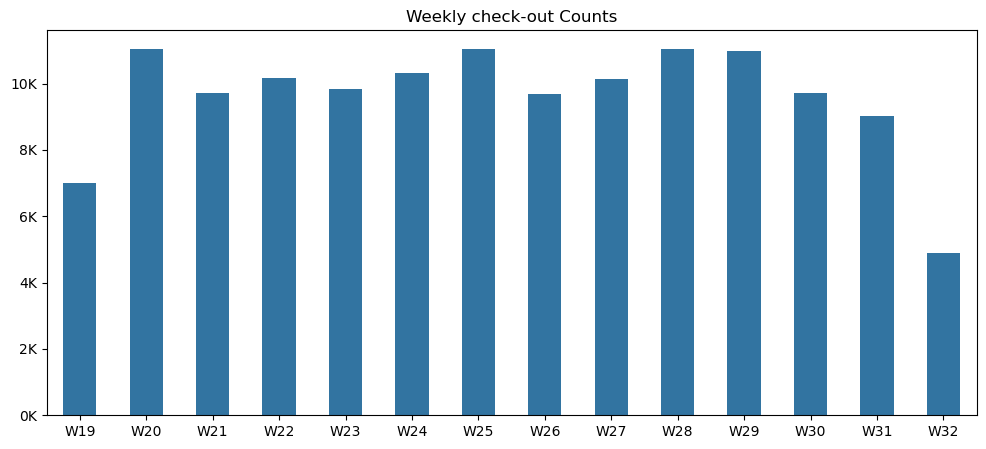

In [36]:
weekly_trend_checkout = df['week_number_checkout'].value_counts().sort_index()
weekly_trend_checkout.index = 'W' + weekly_trend_checkout.index.astype(str)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=weekly_trend_checkout.index, y=weekly_trend_checkout.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Weekly check-out Counts')
plt.xlabel('')
plt.show()

Weekly check-outs peaked consistently between Week 19 and Week 29, indicating a high volume of guest departures during the summer vacation period. The drop in Week 31 suggests the end of the holiday season and a return to lower occupancy trends.

### Revenue trends

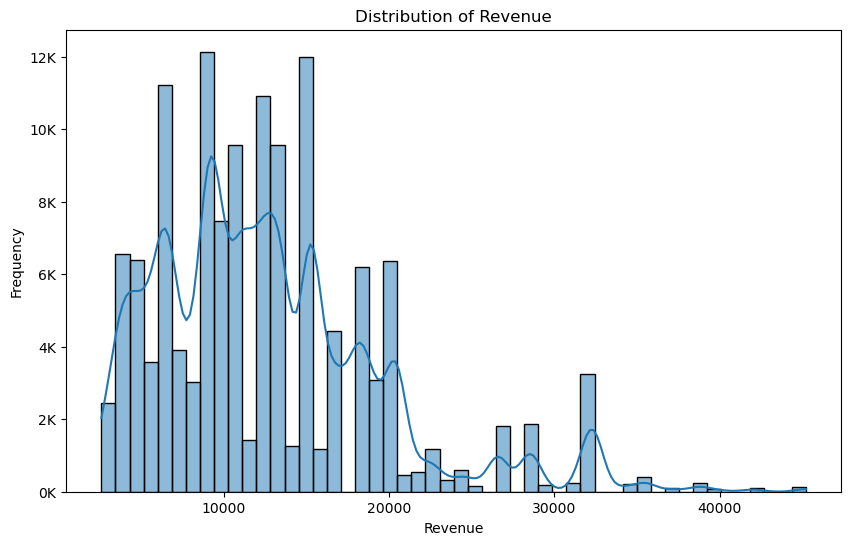

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['revenue_realized'], bins=50, kde=True)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()

From the above revenue distribution plot, we can observe that most of the bookings have lower revenue. High-revenue bookings are rare but do exist — creating a long tail on the 

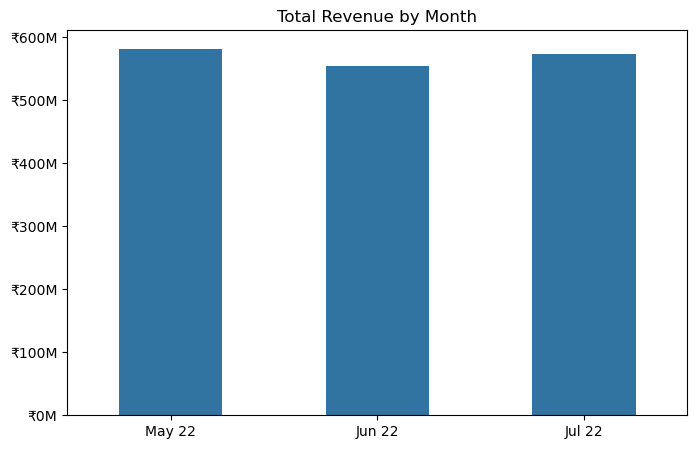

In [38]:
monthly_revenue = df.groupby('month_year')['revenue_realized'].sum().sort_index(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by Month')
plt.xlabel('')
plt.show()

An analysis of monthly revenue trends reveals that the highest revenue contributions consistently occur during the summer vacation months. This seasonal pattern highlights a key period of increased customer activity, suggesting opportunities for targeted promotions and capacity planning.

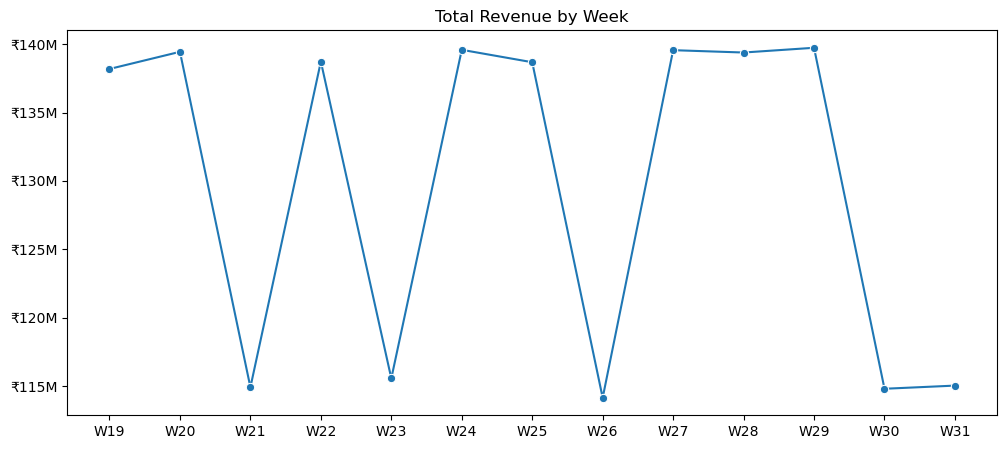

In [39]:
weekly_revenue = df.groupby('week_no')['revenue_realized'].sum().sort_index(ascending=True)
weekly_revenue = weekly_revenue.drop(32, errors='ignore')
weekly_revenue.index =  'W' + weekly_revenue.index.astype(str)

plt.figure(figsize=(12, 5))
ax = sns.lineplot(x=weekly_revenue.index, y=weekly_revenue.values, marker='o')

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.xlabel('')
plt.title('Total Revenue by Week')
plt.show()

Weeks 19 to 30 represent the peak (on-season) period, characterized by consistently high revenue levels. In contrast, Weeks 31 and 32 show a clear downward trend, indicating the beginning of the off-season as customer activity and revenue start to decline.

   property_name property_category  revenue_realized
0      Atliq Bay            Luxury         260051178
1      Atliq Blu            Luxury         260855522
2     Atliq City          Business         285811939
3  Atliq Exotica            Luxury         320312468
4   Atliq Grands            Luxury         211532764
5   Atliq Palace          Business         304081863
6  Atliq Seasons          Business          66125495


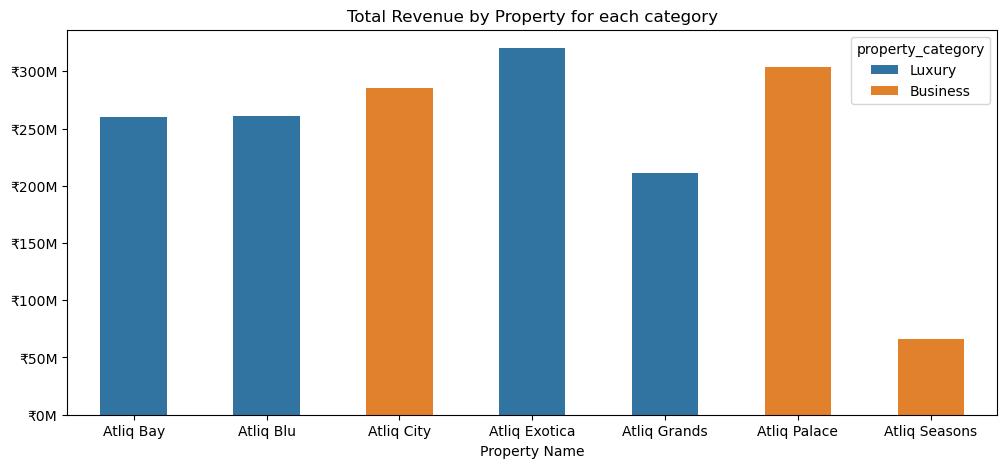

In [40]:
property_category_revenue = df.groupby(['property_name', 'property_category'])['revenue_realized'].sum().reset_index()
print(property_category_revenue)
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='property_name' , y='revenue_realized', hue='property_category', data=property_category_revenue, width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by Property for each category')
plt.xlabel('Property Name')
plt.ylabel('')
plt.show()

Atliq Exotica leads in total revenue, followed by Atliq Palace and Atliq City from the business category. While most luxury properties perform well, Atliq Seasons shows the lowest revenue among all properties.

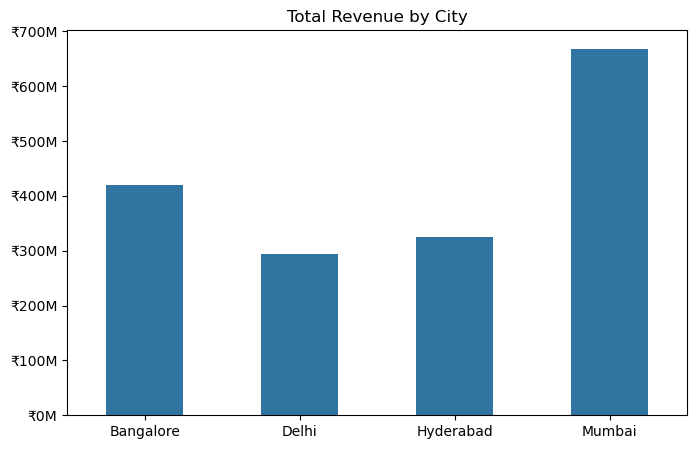

In [41]:
city_revenue = df.groupby('city')['revenue_realized'].sum()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_revenue.index , y=city_revenue.values, width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by City')
plt.xlabel('')
plt.show()

mumbai city has the highest revenue generated

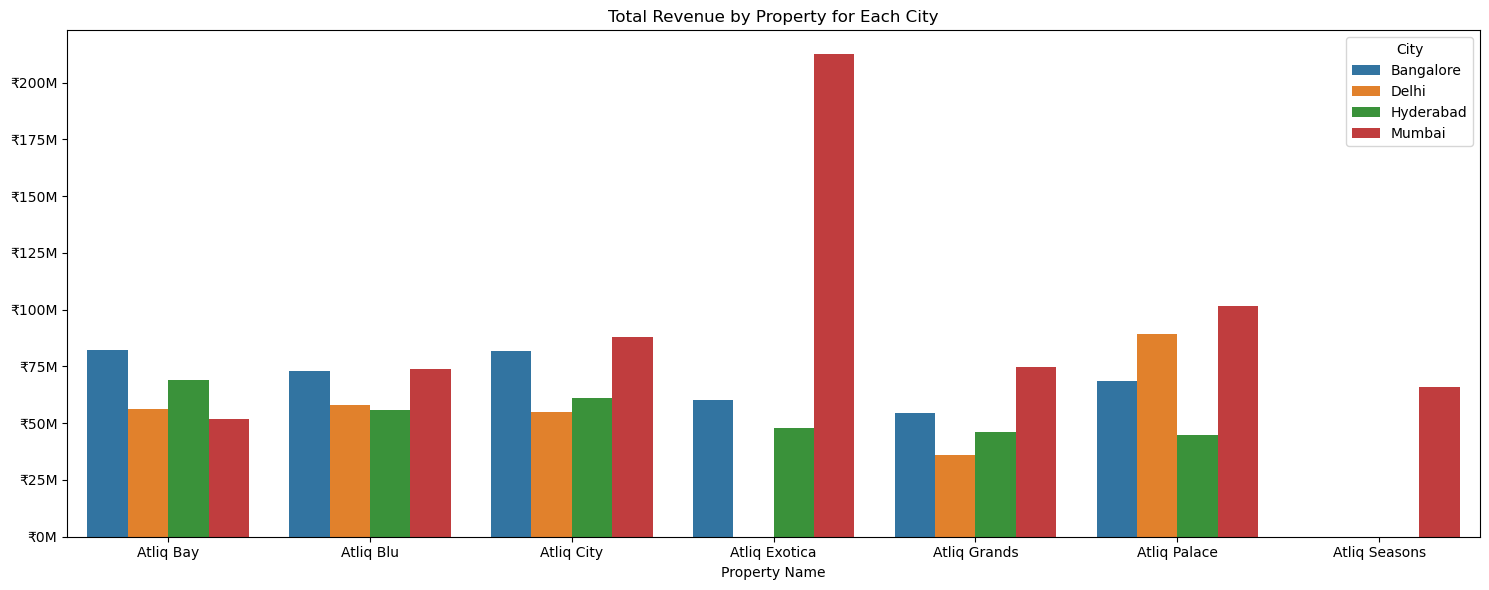

In [42]:
city_revenue = df.groupby(['city', 'property_name'])['revenue_realized'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=city_revenue, x='property_name', y='revenue_realized', hue='city')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title("Total Revenue by Property for Each City")
plt.xlabel("Property Name")
plt.ylabel("")  
plt.legend(title="City")
plt.xticks()
plt.tight_layout()
plt.show()


Mumbai consistently outperforms other cities in revenue across all properties, with a noticeable peak at Atliq Seasons.

  room_category    room_class  revenue_realized
0           RT1      Standard         309580895
1           RT2         Elite         560271204
2           RT3       Premium         462166344
3           RT4  Presidential         376752786


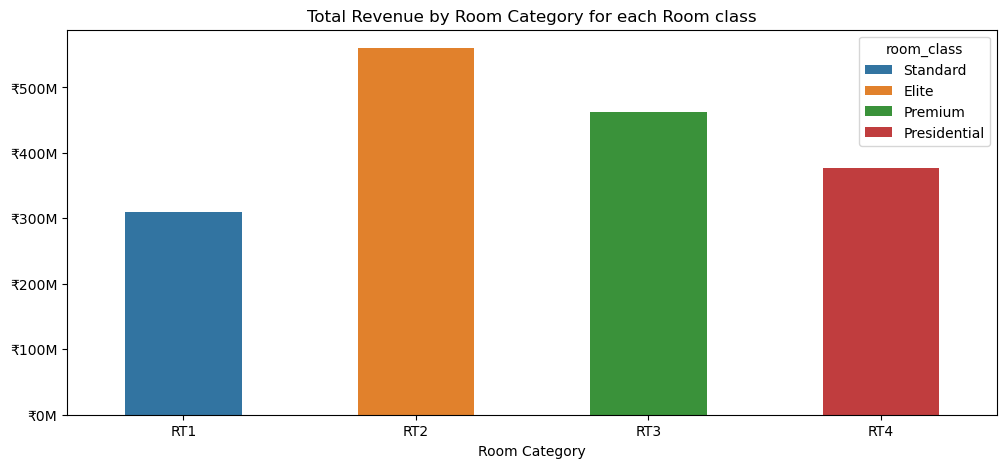

In [43]:
room_category_revenue = df.groupby(['room_category', 'room_class'])['revenue_realized'].sum().reset_index()
print(room_category_revenue)
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='room_category' , y='revenue_realized', data=room_category_revenue, hue='room_class', width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by Room Category for each Room class')
plt.xlabel('Room Category')
plt.ylabel('')
plt.show()

Elite rooms are the top revenue-generating category, indicating strong demand for upscale offerings. Premium and Presidential rooms follow, while Standard rooms contribute the least, highlighting a clear guest preference toward higher-tier room experiences.

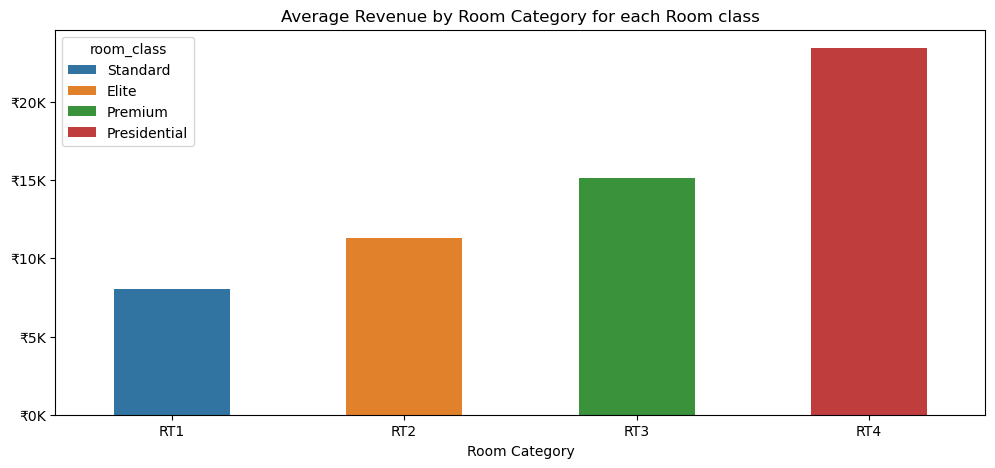

In [44]:
room_category_revenue = df.groupby(['room_category', 'room_class'])['revenue_realized'].mean().reset_index()
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='room_category' , y='revenue_realized', data=room_category_revenue, hue='room_class', width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e3)}K'))
plt.title('Average Revenue by Room Category for each Room class')
plt.xlabel('Room Category')
plt.ylabel('')
plt.show()

Elite rooms generate the highest total revenue with a moderate average revenue per booking, making them the most frequently booked and the biggest overall contributor to revenue.

Presidential rooms have moderate to high total revenue, but boast the highest average revenue per booking, indicating fewer bookings but maximum value per guest.

Premium rooms perform strongly in both total and average revenue, offering a balanced contribution in terms of volume and value.
On the other hand, Standard rooms bring in the lowest total and average revenue, making them the least profitable room class in the portfolio.



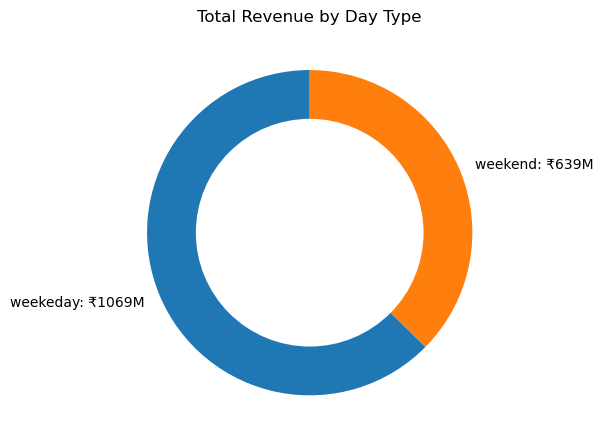

In [45]:
dayType_revenue = df.groupby('day_type')['revenue_realized'].sum()

# Prepare values and labels
labels = dayType_revenue.index
values = dayType_revenue.values
formatted_labels = [f"{label}: ₹{int(val/1e6)}M" for label, val in zip(labels, values)]

# Plot donut chart
plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(values, labels=formatted_labels, startangle=90, wedgeprops=dict(width=0.4))

# Draw circle in center for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and layout
plt.title('Total Revenue by Day Type')
plt.tight_layout()
plt.show()

Weekdays contribute significantly more to total revenue compared to weekends, indicating stronger business or regular travel demand during the workweek.

Consider introducing weekend-specific promotions or leisure packages to boost occupancy and revenue on lower-performing days, helping balance overall utilization across the week.

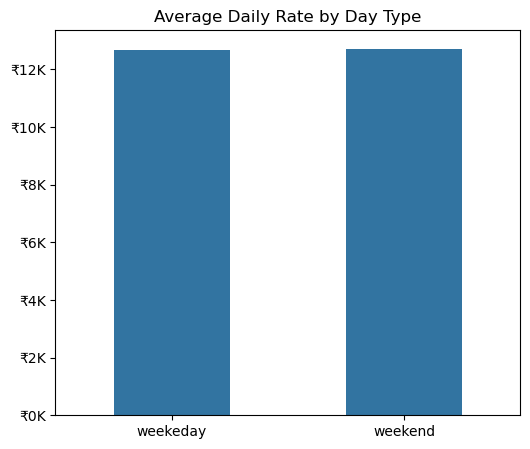

In [46]:
dayType_revenue = df.groupby('day_type')['revenue_realized'].mean()
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=dayType_revenue.index , y=dayType_revenue.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e3)}K'))
plt.title('Average Daily Rate by Day Type')
plt.xlabel("")  # This removes the x-axis label
plt.show()


Although weekdays generate higher total revenue, the average revenue per booking is nearly the same for both weekdays and weekends. This suggests that the lower weekend revenue is due to fewer bookings, not lower spend per customer.

###  Occupany % & Room trends

In [47]:
or_df = pd.merge(fact_aggregated_bookings_df,  dim_rooms_df, left_on="room_category", right_on="room_id", how="left")
or_df = pd.merge(or_df, dim_hotels_df, on="property_id", how="left")
or_df = pd.merge(or_df, dim_date_df, left_on="check_in_date", right_on="date", how="left")

In [48]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
 5   room_id              9200 non-null   object        
 6   room_class           9200 non-null   object        
 7   property_name        9200 non-null   object        
 8   category             9200 non-null   object        
 9   city                 9200 non-null   object        
 10  date                 9200 non-null   datetime64[ns]
 11  mmm yy               9200 non-null   object        
 12  week no              9200 non-null   object        
 13  day_type             9200 non-nul

In [49]:
or_df.drop(columns=["room_id", "date"], inplace=True)

In [50]:
or_df.rename(columns={'category': 'property_category', 'mmm yy':'month_year', 'week no':'week_no'}, inplace=True)

In [51]:
or_df.drop_duplicates(inplace=True)

In [52]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
 5   room_class           9200 non-null   object        
 6   property_name        9200 non-null   object        
 7   property_category    9200 non-null   object        
 8   city                 9200 non-null   object        
 9   month_year           9200 non-null   object        
 10  week_no              9200 non-null   object        
 11  day_type             9200 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 862.6+ KB


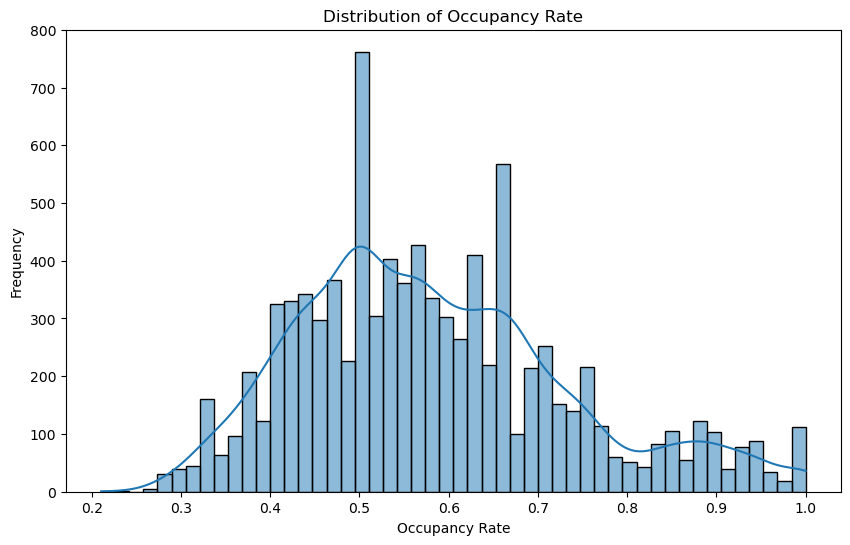

In [53]:
or_df['occupancy_rate'] = or_df['successful_bookings'] / or_df['capacity']
plt.figure(figsize=(10, 6))
ax = sns.histplot(or_df['occupancy_rate'], bins=50, kde=True)

plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Occupancy Rate')
plt.show()

The distribution of occupancy rates is concentrated between 0.45 and 0.70, indicating that most properties operate at moderate utilization levels. While a few instances reach high occupancy (above 0.9), the overall pattern is slightly right-skewed, suggesting room for improvement.

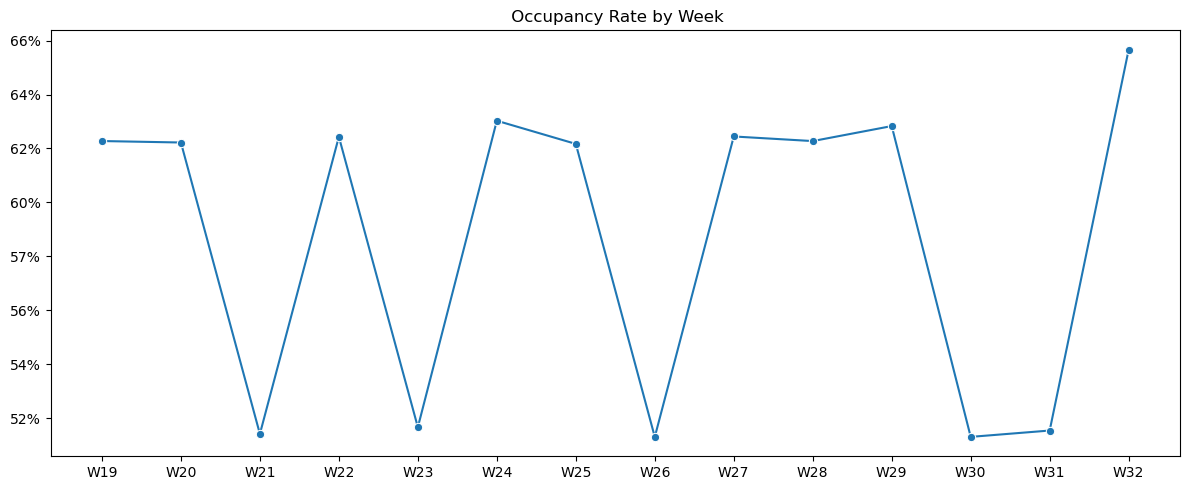

In [54]:
occupancy_week = or_df.groupby('week_no')['occupancy_rate'].mean()

def clean_week_label(w):
    week_num = ''.join(filter(str.isdigit, str(w)))
    return f'W{int(week_num)}'

occupancy_week.index = [clean_week_label(w) for w in occupancy_week.index]


plt.figure(figsize=(12, 5))
sns.lineplot(data=occupancy_week, marker="o")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))
plt.title(' Occupancy Rate by Week')
plt.xlabel('')
plt.ylabel('')
plt.xticks()
plt.tight_layout()
plt.show()


The occupancy rate consistently peaks during the last week of each month (W20, W24, W28, W32)

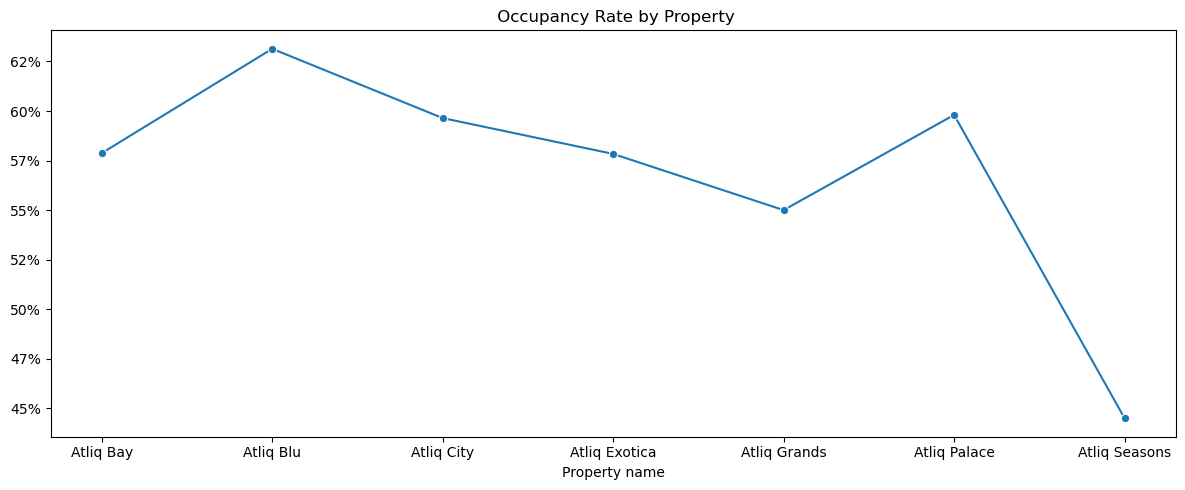

In [55]:
occupancy_property = or_df.groupby('property_name')['occupancy_rate'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=occupancy_property, marker="o")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))
plt.title(' Occupancy Rate by Property')
plt.xlabel('Property name')
plt.ylabel('')
plt.xticks()
plt.tight_layout()
plt.show()


Property Atliq Blu has the highest occupancy rate

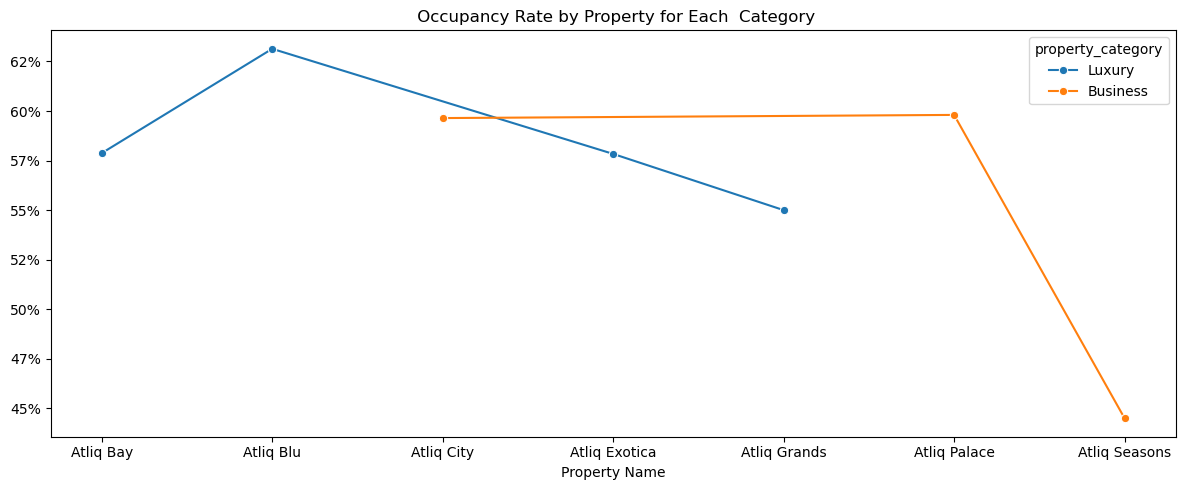

In [56]:
occupancy_property_category = or_df.groupby(['property_name', 'property_category'])['occupancy_rate'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(
    x='property_name',
    y='occupancy_rate',
    hue='property_category',
    data=occupancy_property_category,
    marker="o"
)

# Format Y-axis as percentage
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))
plt.title(' Occupancy Rate by Property for Each  Category')
plt.xlabel('Property Name')
plt.ylabel('')
plt.xticks()
plt.tight_layout()
plt.show()

Luxury properties like Atliq Blu and Atliq Bay maintain higher occupancy rates, while business properties such as Atliq Seasons show notably lower performance

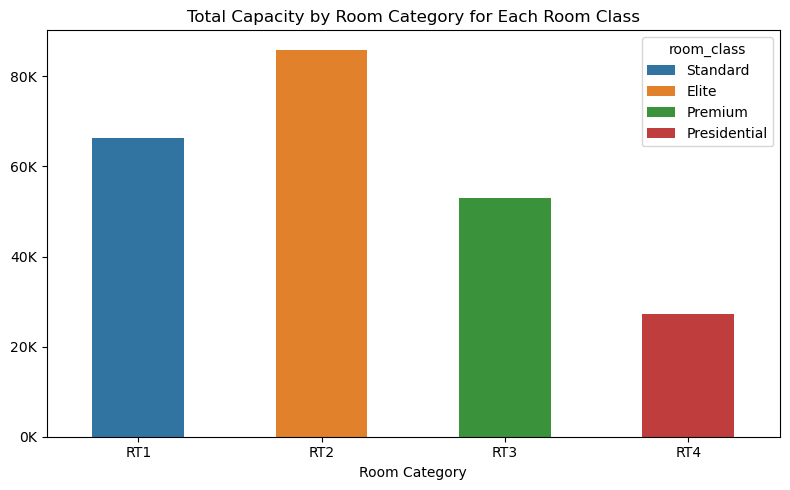

In [57]:
room_capacity = or_df.groupby(['room_category', 'room_class'])['capacity'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='room_category', y='capacity', data=room_capacity, hue='room_class', width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Total Capacity by Room Category for Each Room Class')
plt.xlabel('Room Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

Elite and Standard room categories offer the highest capacity, indicating a focus on volume and availability, while Presidential rooms have the lowest capacity, reflecting their exclusive, high-value positioning within the room mix.

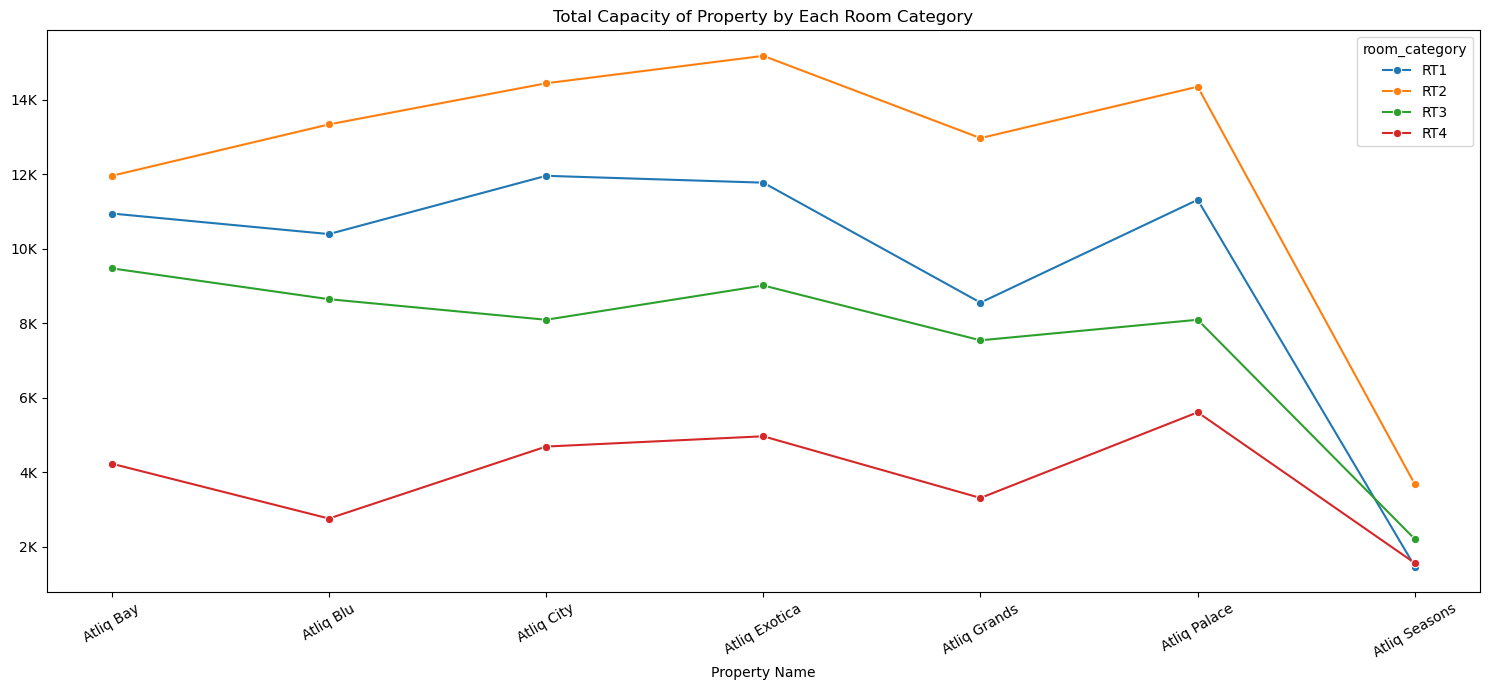

In [58]:
property_room_capacity = or_df.groupby(['property_name', 'room_category'])['capacity'].sum().reset_index()

# Plot
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='property_name', y='capacity', hue='room_category', data=property_room_capacity, marker='o')

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Total Capacity of Property by Each Room Category')
plt.xlabel('Property Name')
plt.ylabel('')  # No Y-axis label
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Most properties maintain high capacity for Elite rooms (RT2), reflecting a strategic focus on this well-balanced, high-demand segment. Premium and Standard rooms vary by property, likely tailored to local guest needs. Presidential rooms (RT4) are consistently limited, reinforcing their exclusive, luxury positioning.

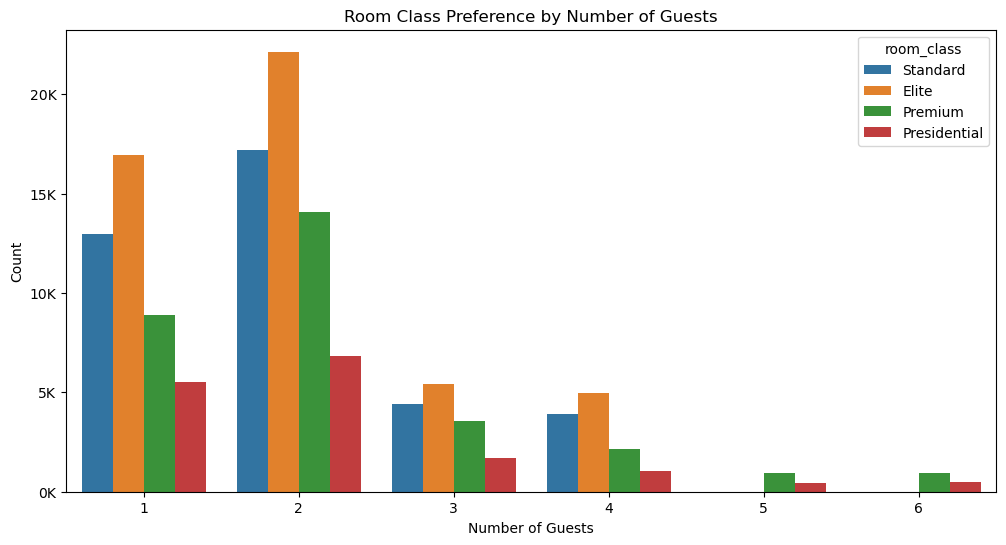

In [59]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='no_guests', hue='room_class', data=df)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.xlabel('Number of Guests')
plt.ylabel('Count')
plt.title('Room Class Preference by Number of Guests')
plt.show()

Elite rooms are the most preferred across all guest group sizes, especially for solo and two-person stays
Premium and Presidential rooms see relatively higher share, suggesting they're favored for accommodating larger parties

### Booking platform analysis

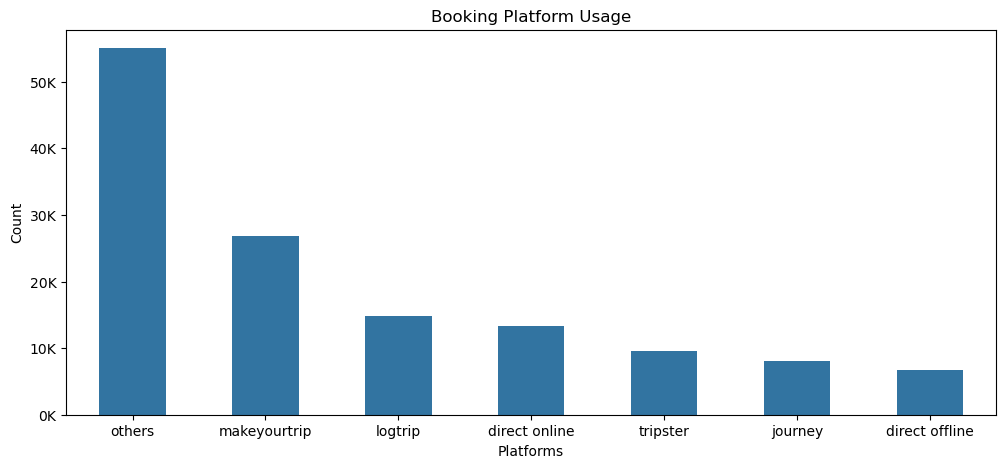

In [60]:
platform_count = df['booking_platform'].value_counts()
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=platform_count.index , y=platform_count.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Booking Platform Usage')
plt.xlabel('Platforms')
plt.ylabel('Count')
plt.show()

other booking platform has the highest number of user followed by makeyourtrip

### Booking Status Analysis

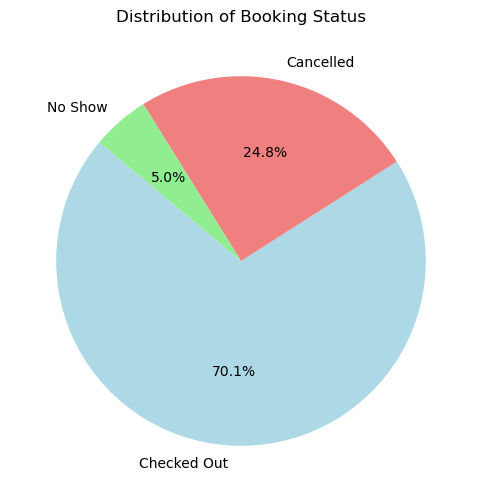

In [61]:
booking_status_counts = df['booking_status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Booking Status')
plt.show()

most of the bookings are in checkout category with 70% 





#### Conclusion :
1. as bookings are done 1-2 weeks prior the checkin date pricing should be increased before hand for greater profit
2. on weekends pricing should be high for more profit
3. room class elite has the highest room capacity with less price. So, price should be increased for Elite for more profit generation
4. A high % of bookings result in check-out, showing good operational efficiency.
5. Luxury properties (e.g., Atliq Blu, Bay) show better occupancy compared to Business properties like Atliq Seasons.
6. prices are static it should be dynamic for more profit (eg. weekends price should be little higher compare to weekdays )